 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [4]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

def check_normality(data,alpha=0.05):
    #
    stat,p_value = stats.shapiro(data)
    #
    if p_value < alpha:# условие статистической значимости
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

def ttest(mens,womens,alpha=0.001):
    stat,p_value = stats.ttest_ind(mens,womens,equal_var=False)
    if p_value < alpha:# условие статистической значимости
        print("Отклоняем нулевую гипотезу >> Различие между ростом мужчин и женщин значимо")
    else:
        print("Не отклоняем нулевую гипотезу >> Различие между ростом мужчин и женщин незначительно")

ttest(mens,womens,alpha=0.001)

Отклоняем нулевую гипотезу >> Различие между ростом мужчин и женщин значимо


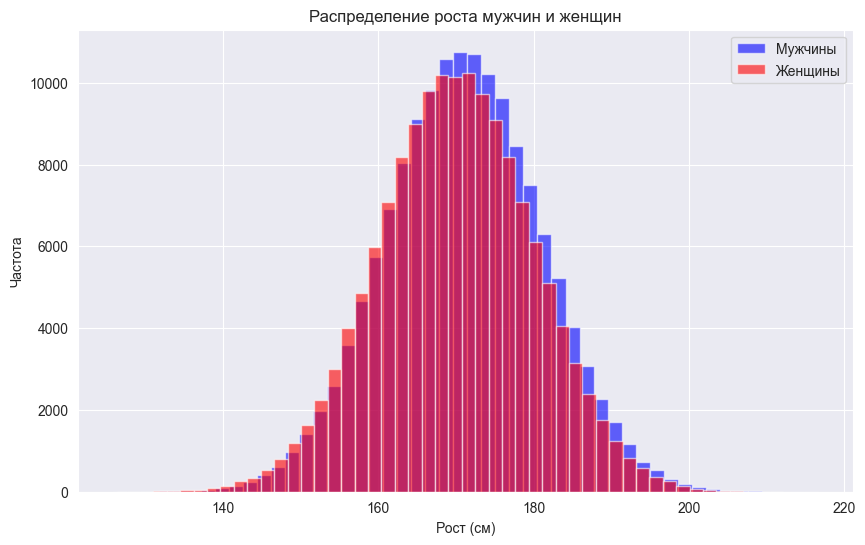

In [ ]:
# Визуализация распределений
plt.figure(figsize=(10,6))
plt.hist(mens, bins=50, alpha=0.6, label='Мужчины', color='blue')
plt.hist(womens, bins=50, alpha=0.6, label='Женщины', color='red')
plt.title('Распределение роста мужчин и женщин')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')
plt.legend()
plt.show()

Мне кажется что различие между ростом мужчин и женщин с практической точки зрения незначимо. так как разница в 1см в повседневной жизни не имеет значимого воздействия, например, на выбор одежды. Это никак не влияет на здоровье или других похожие факторы.


<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Тест Шапиро-Уилка для группы Test Team: p-value = 0.004620073473463572
Данные для группы Test Team не нормально распределены.

Тест Шапиро-Уилка для группы Developer Team: p-value = 0.0004891132750699216
Данные для группы Developer Team не нормально распределены.

Тест Манна-Уитни: p-value = 0.8226484074918565
Не отклоняем нулевую гипотезу: разница в сверхурочном времени между командами незначительна.


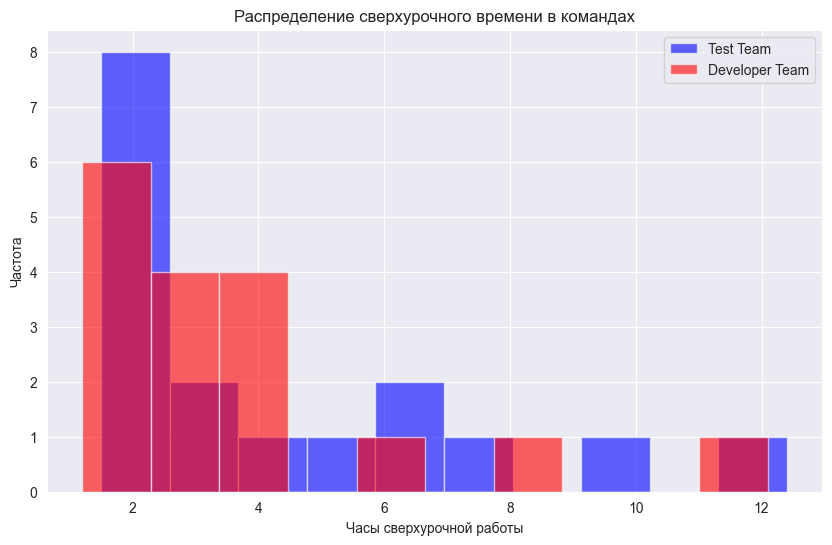

In [ ]:
# 1. Проверка нормальности с помощью теста Шапиро-Уилка
def check_normality(data, group_name):
    stat, p_value = stats.shapiro(data)
    print(f"Тест Шапиро-Уилка для группы {group_name}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"Данные для группы {group_name} не нормально распределены.\n")
    else:
        print(f"Данные для группы {group_name} нормально распределены.\n")

check_normality(test_team, 'Test Team')
check_normality(developer_team, 'Developer Team')

# 2. Выполнение # Теста Манна-Уитни для независимых выборок
alpha = 0.05  # Уровень значимости

stat, p_value = stats.mannwhitneyu(test_team, developer_team, alternative='two-sided')
print(f"Тест Манна-Уитни: p-value = {p_value}")

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: существует статистически значимая разница в сверхурочном времени между командами.")
else:
    print("Не отклоняем нулевую гипотезу: разница в сверхурочном времени между командами незначительна.")

# Визуализация распределений данных
plt.figure(figsize=(10,6))
plt.hist(test_team, bins=10, alpha=0.6, label='Test Team', color='blue')
plt.hist(developer_team, bins=10, alpha=0.6, label='Developer Team', color='red')
plt.title('Распределение сверхурочного времени в командах')
plt.xlabel('Часы сверхурочной работы')
plt.ylabel('Частота')
plt.legend()
plt.show()

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Проверка нормальности для каждой группы с помощью теста Шапиро-Уилка
def check_normality(data, group_name):
    stat, p_value = stats.shapiro(data)
    print(f"Тест Шапиро-Уилка для группы {group_name}: p-value = {p_value}")
    return p_value >= 0.05  # Если p-value >= 0.05, данные нормально распределены

# Проверяем нормальность для каждой группы
normal = {group_name: check_normality(data, group_name)
          for data, group_name in zip([only_breast, only_formula, both], ['Only Breast', 'Only Formula', 'Both'])}

# Применяем ANOVA, если все группы нормально распределены, иначе используем Краскала-Уоллиса
if all(normal.values()):
    f_stat, p_value_anova = stats.f_oneway(only_breast, only_formula, both)
    print(f"ANOVA: p-value = {p_value_anova}")

    if p_value_anova < 0.05:
        print("Отклоняем нулевую гипотезу: есть статистически значимая разница между группами.")
        print("\nПроводим пост-хок анализ с использованием теста Тьюки...")

        data = np.concatenate([only_breast, only_formula, both])
        groups = ['Only Breast'] * len(only_breast) + ['Only Formula'] * len(only_formula) + ['Both'] * len(both)

        tukey = pairwise_tukeyhsd(data, groups, alpha=0.05)
        print(tukey)
    else:
        print("Не отклоняем нулевую гипотезу: разницы между группами нет.")
else:
    print("Данные не нормально распределены, используем тест Краскала-Уоллиса.")

    h_stat, p_value_kruskal = stats.kruskal(only_breast, only_formula, both)
    print(f"Тест Краскала-Уоллиса: p-value = {p_value_kruskal}")

    if p_value_kruskal < 0.05:
        print("Отклоняем нулевую гипотезу: есть статистически значимая разница между группами.")
        print("\nПроводим парные сравнения с использованием теста Манна-Уитни:")
        for (group1, group2, label1, label2) in [
            (only_breast, only_formula, 'Only Breast', 'Only Formula'),
            (only_breast, both, 'Only Breast', 'Both'),
            (only_formula, both, 'Only Formula', 'Both')
        ]:
            stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            print(f"Сравнение {label1} и {label2}: p-value = {p_value}")
            print("Разница статистически значимая." if p_value < 0.05 else "Разница не статистически значимая.\n")
    else:
        print("Не отклоняем нулевую гипотезу: разницы между группами нет.")


Тест Шапиро-Уилка для группы Only Breast: p-value = 0.46941822697846664
Тест Шапиро-Уилка для группы Only Formula: p-value = 0.8879017977756607
Тест Шапиро-Уилка для группы Both: p-value = 0.7972954389530497
ANOVA: p-value = 7.18623550288582e-09
Отклоняем нулевую гипотезу: есть статистически значимая разница между группами.

Проводим пост-хок анализ с использованием теста Тьюки...
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       Both  Only Breast -60.1286 0.0995 -129.1485   8.8912  False
       Both Only Formula 149.2636    0.0   82.3651 216.1621   True
Only Breast Only Formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


Разница между группами "Only Breast" и "Only Formula" является статистически значимой, что означает, что для детей, получающих только смесь, прирост веса в месяц выше, чем для детей, получающих только грудное молоко.

Разница между группами "Both" и "Only Formula" также статистически значима, указывая на то, что дети, получающие оба вида питания, имеют меньший прирост веса по сравнению с детьми, которые получают только смесь.
